# Image Processing with Linear Algebra and Multivariable Calculus  Project code notebook


---




**Course**: MATH211: Multivariable Calculus & Linear Algebra

**Team Members**: Jason,
                     Gervais Mboninkunda, and
                     Kwaku

**University**: Ashesi University  

**Semester**: YI, Second Semester Summer 2025

**Project Title**: Application of Multivariable Calculus and Linear Algebra Concepts in Image Processing
  
**Submittion date**: 20th, Jully 2025


## Task 1:  Setting Up the Development Environment for Project coding part

To begin our project, we used Python as our main programming language. Since it was already installed on our machines previously from the Computer Programming for Engineering course, we didn’t need to install it again. However, not all group members had Jupyter Notebook installed, so one team member helped the rest to set it up locally because he used to use it before. We chose Jupyter Notebook because it supports step-by-step coding and easy testing of image outputs, which makes collaboration smoother. Although we started using Google Colab for its collaboration features, we also tested the project locally because Colab doesn’t support downloading notebooks with image outputs for direct submission. Also, since files in Colab are mounted from Google Drive, the paths to those files break when the notebook is downloaded, making it difficult for the lecturer to view images or results properly. Running everything locally ensured it all worked before submission. We then installed the required Python libraries for image processing and calculations, and those include but are not limited to: numpy for matrix and array operations, matplotlib for displaying images and plots, opencv-python (cv2) for loading and resizing images This setup made it possible to apply image processing techniques while combining key concepts from Linear Algebra and Multivariable Calculus throughout the project.


In [35]:
# Installing all possible required libraries for image processing by using linear algebra and Multivariable calculus

!pip install numpy==1.24.4 
!pip install scipy     
!pip install matplotlib  
!pip install opencv-python   
!pip install Pillow   
!pip install scikit-image



In [36]:
# Importing required modules from pre-installed libraries above
import numpy as np     # for numerical computations
import matplotlib.pyplot as plt # for data visualization
import cv2  # This is a module for loading image by using Open cv library
from skimage import io, filters, color, transform  # for image manupulation and processing
from PIL import Image # this is for opening, displayig, croping, or converting image files easily
from scipy import linalg  # This a scientific python library that gives more advanced mathematical computations  like finding eigen values, differentiation, integration, SDV calculation and others


## Task 2: Loading and displaying the chosen Grayscale image to be processed

### In this task, our goal is to load a real  grayscale image of handwritten notes (a C code assignment from one of our team members), and then we will go ahead and do further analysis by using Linear Algebra and Multivariable Calculus Principles.

In [37]:
# Notes for this project reviewer
# The following two lines were used earlier when we ran this notebook on Google Colab:
# from google.colab import drive
# drive.mount('/content/drive')
# Since we are now running everything locally in Jupyter Notebook, we no longer need to mount Google Drive.
# We have placed all required image files in the same folder as this notebook for local access.


In [38]:
import cv2
from PIL import Image
import numpy as np

# Load the original grayscale image
gray_image_path = 'Grayscale_handwrittenImage.jpeg'
gray_image = cv2.imread(gray_image_path, 0)

# Resize the image to 512x512 (standard size with preserved detail)
gray_image = cv2.resize(gray_image, (512, 512), interpolation=cv2.INTER_AREA)

# Apply CLAHE instead of regular histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray_image = clahe.apply(gray_image)






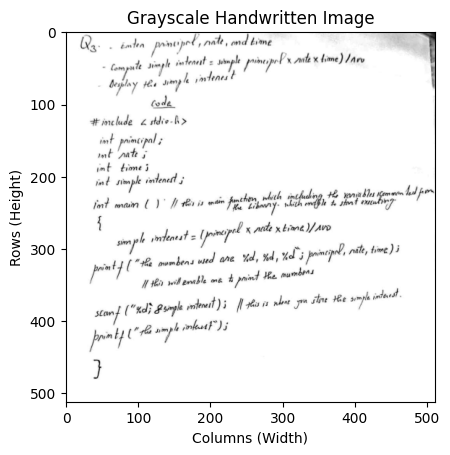

In [39]:
# Let's now display the image by using python visualization tool or library called matplotlib

plt.imshow(gray_image, cmap='gray')                      # Displays the image in grayscale where 0 is black, 255 is white, and values in between are shades of gray.

plt.title('Grayscale Handwritten Image')
plt.axis('on')                                                              # we left the axes on so it’s easier to see the image position and layout, but we can turn them off if a clean look is needed.
plt.xlabel('Columns (Width)')
plt.ylabel('Rows (Height)')
plt.grid(False)                                                             # Currently the gridlines are off but we can turn them on by changing False into True
plt.show()



In [40]:
# Now after displaying the image let's print the image shape determined by its height(number of rows) and width(number of columns) in numpy array of image
print("Image shape:", gray_image.shape)
# Now, this is the actual numpy array or matrix in terms of its rows(height) and columns(width) of above image and its printed on new line to ensure clean code
print("Pixel values:\n", gray_image)


Image shape: (512, 512)
Pixel values:
 [[255 255 255 ...  25  20  18]
 [255 255 255 ...  23  20  19]
 [255 255 255 ...  33  28  25]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


# Task 3: Applying Basic Linear Transformations

### In this task, we are performing an image processing operation called convolution, where we use different types of kernel arrays to transform the original image and observe the differences between the original and the transformed versions.

In [41]:
# Let's import numpy and Matplotlib libraries as they are going to be usefull in this task
import numpy as np

Defining the convolution kernels

In [42]:
# Alongside the given kernels (transformation functions), we added a fifth one (Gaussian) to explore the image more deeply and reveal extra details about it.
# The following are different convolution kernels we will use, where each give different effect

# Blur Kernel
blur_kernel = 1/9 * np.array( [[1, 1, 1], [1, 1, 1], [1, 1, 1]])

#  sharpen kernel
sharpen_kernel = sharpen_kernel = np.array([[ 0, -1,  0], [-1,  5, -1], [ 0, -1,  0]])

# edge detection kernel
edge_kernel = np.array([ [-1, -1, -1], [-1,  8, -1], [-1, -1, -1]])

# Emboss Kernel
emboss_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])

# Gausian blur kernel (Added by our team to explore more and uncover more about the image)
gaussian_kernel = 1/16 * np.array([[1, 2, 1],[2, 4, 2], [1, 2, 1]])


## The convolution Function written from Scratch

In [43]:
def convolution_function(image, kernel, mode="display"):
    """
  This function applies a convolution filter to a 2D image using the kernel provided.
  If mode is "display", it prepares the output as a normal image that can be shown using imshow. and if  mode is "raw", it keeps the exact values for calculations like gradients.
    """
    image_height, image_width = image.shape
    kernel_size = kernel.shape[0]
    pad = kernel_size // 2

    # Pad the image to preserve dimensions
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)

    # Create an empty output image
    output_image = np.zeros_like(image, dtype=float)

    # Apply convolution
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            output_image[i, j] = np.sum(region * kernel)

    # Handle output type
    if mode == "display":
        output_image = np.clip(output_image, 0, 255)
        return output_image.astype(np.uint8)
    else:
        return output_image





### Applying the convolution kernels and then display the result on the screen

Applying: Blur kernel
Applying: Sharpen kernel
Applying: Edge Detection kernel
Applying: Emboss kernel
Applying: Gaussian Blur kernel


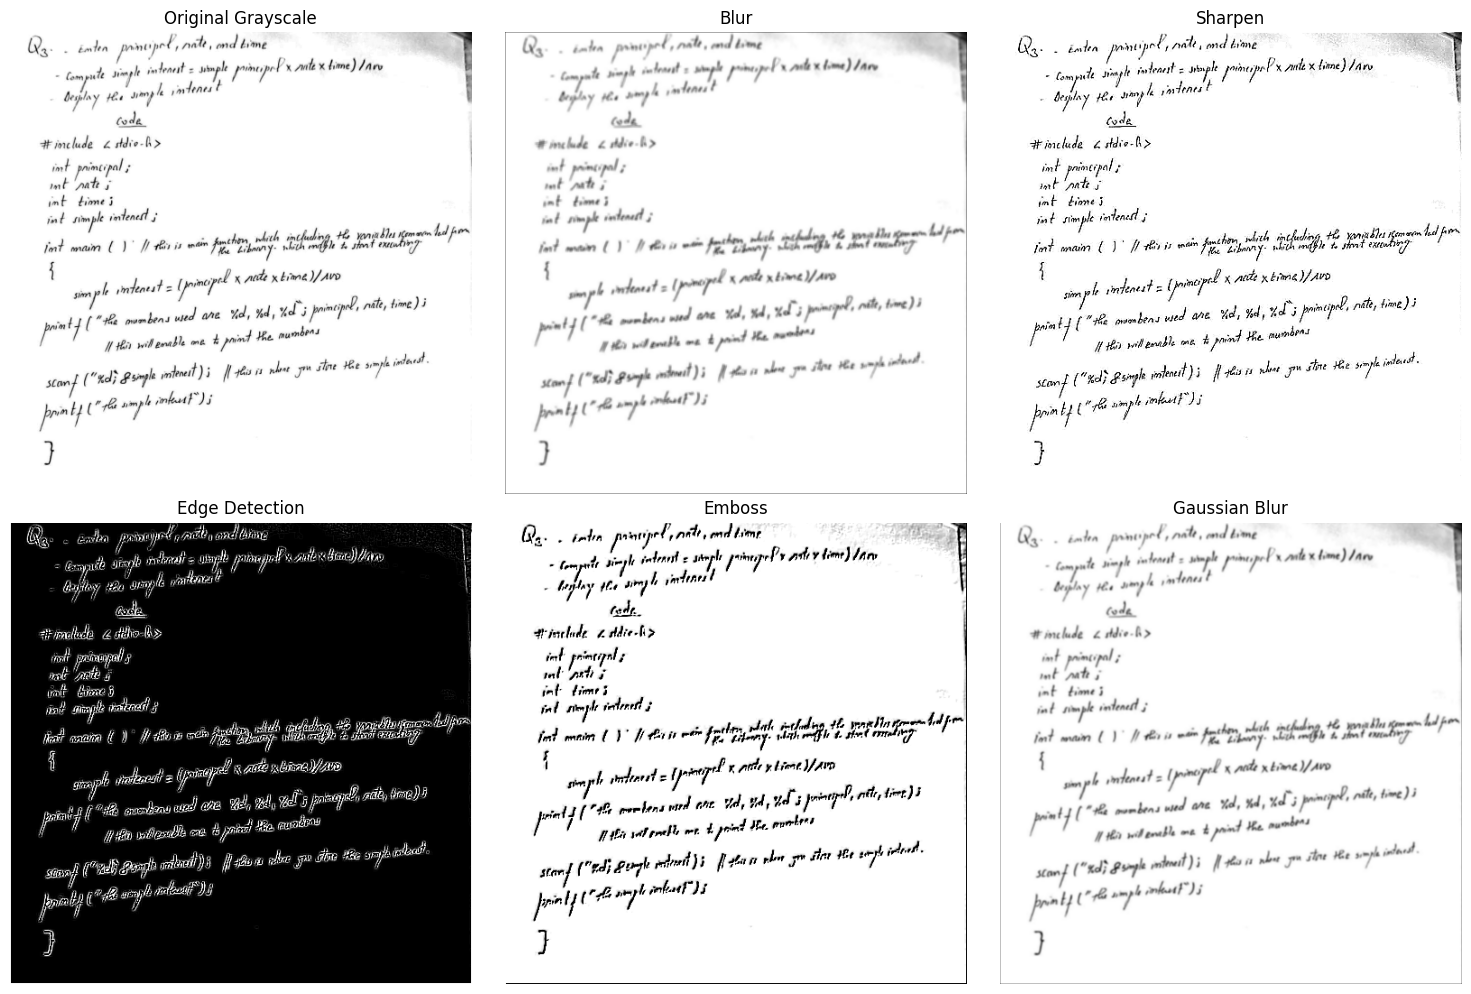

In [44]:
import matplotlib.pyplot as plt
 # Let's now go through each kernel and visualize it
kernels = {"Blur": blur_kernel,"Sharpen": sharpen_kernel,"Edge Detection": edge_kernel, "Emboss": emboss_kernel, "Gaussian Blur": gaussian_kernel}

# Now, the following are the elemets to be applied to image plot transformed from each kernel
plt.figure(figsize=(15, 10))

# First of all, lets show the orginal grayscal image for easy comparison
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

# Let's now apply each kernel and show its result
index = 2
for kernel_name, kernel in kernels.items():
  print(f"Applying: {kernel_name} kernel")
  transformed_image = convolution_function(gray_image,  kernel, mode="display")
  plt.subplot(2, 3, index)
  plt.imshow(transformed_image, cmap='gray')
  plt.title(kernel_name)
  plt.axis('off')
  index += 1
plt.tight_layout()
plt.show()









# Task 4: Edge Detection using Gradients

### We are going to first define the sobel filters in the direction of the two coordinates axes

In [45]:
import numpy as np
# This is sobel filter for detecting vertical edges (in x-direction), simply this shows the edges that changes in x direction and indicated by vertical lines
sobel_x = np.array([ [-1, 0, 1],[-2, 0, 2], [-1, 0, 1]])

# Lets define the sobel filter for detecting horizontal edges(in y-direction), this one highlights the edges that change in y direction  and shown by horizontal lines
sobel_y = np.array([ [-1, -2, -1],[0, 0, 0], [1, 2, 1]])


### Now, let's use the convolution function to compute the partial derivatives in both x and y directions by using pre-defined sobel filters and then show them on screen to see how they affect the image

In [46]:
# Partial derivatives by convolving the image with Sobel filters
gradient_x = convolution_function(gray_image, sobel_x, mode = "row")
gradient_y = convolution_function(gray_image, sobel_y, mode = "row")

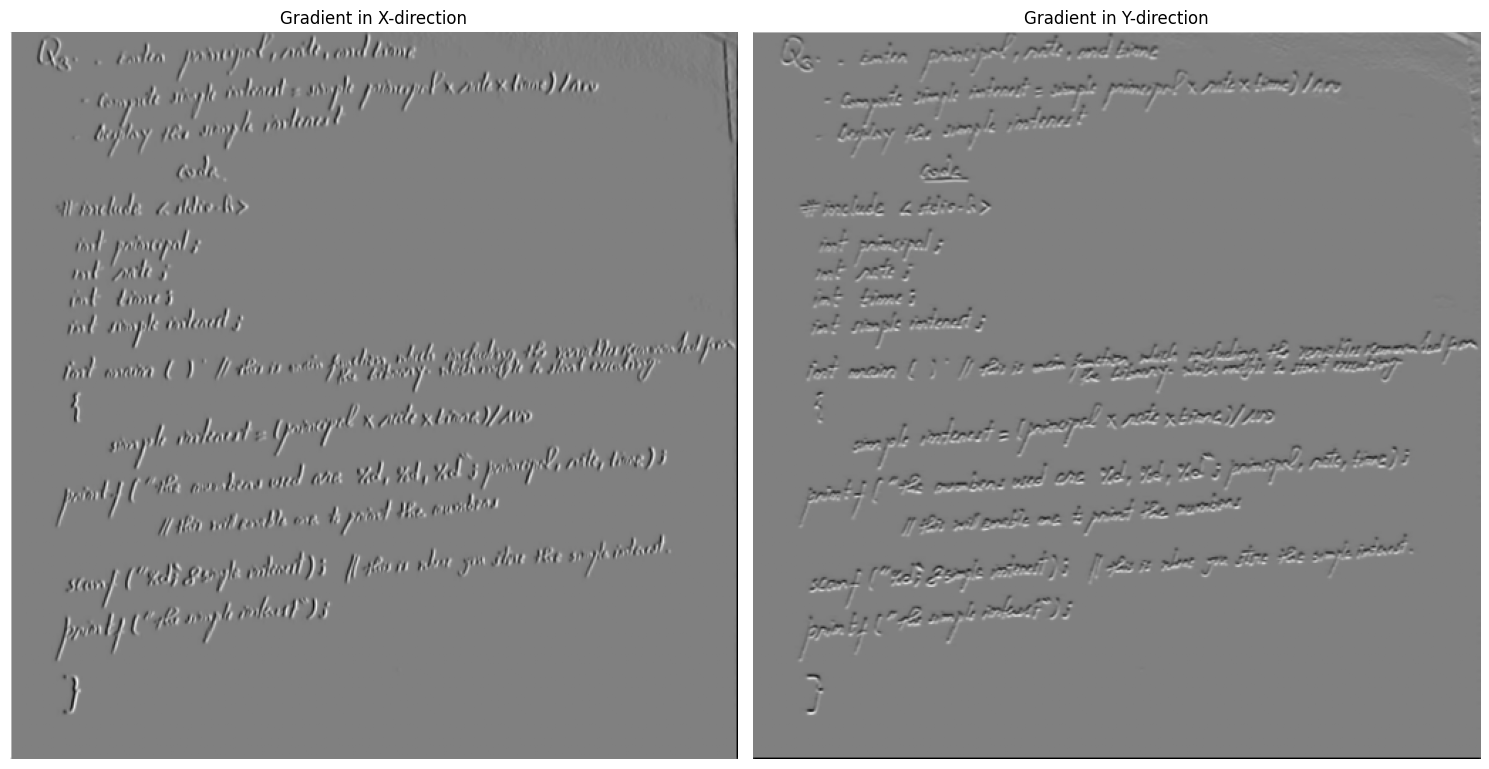

In [47]:
# Now lets display them on the screen side by side for visual detection
plt.figure(figsize=(15, 10))

# Visual representation of Gradient with respect to x axis
plt.subplot(1, 2, 1)
plt.imshow(gradient_x, cmap='gray')
plt.title('Gradient in X-direction')
plt.axis('off')

# Visual representation of Gradient with respect to y axis
plt.subplot(1, 2, 2)
plt.imshow(gradient_y, cmap='gray')
plt.title('Gradient in Y-direction')
plt.axis('off')

plt.tight_layout()
plt.show()





### Now, it's time to calculate the magnitude of the gradient and show the result visually


In [48]:
# we used the formula sqrt of (gx**2 +gy**2)to establish the gradient magnitude
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Since  we are not sure that the image is in  normal range of (gradient magnitude, o, 225 ) as gray scale image should be, we are going to normalize it and then get 8 bit image
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
gradient_magnitude = gradient_magnitude.astype(np.uint8)

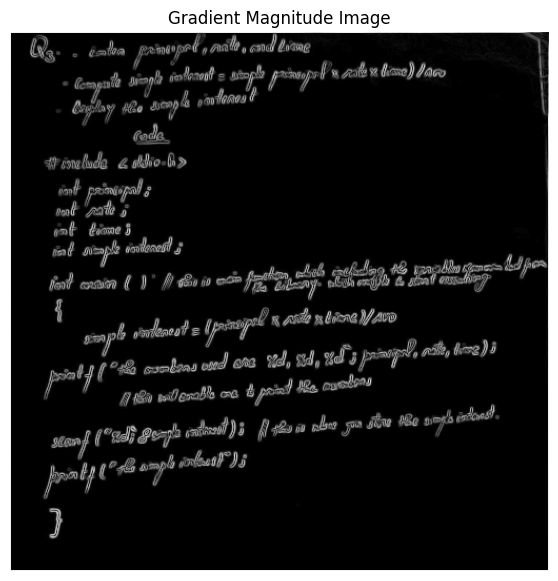

In [49]:
# Normally, the gradient magnitude shows how strong the edge is in each pixel of the image
# We normalized it in order to avoid loss of some image details and ensure clearler grayscale image
plt.figure(figsize=(7, 7))
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude Image')
plt.axis('off')
plt.show()


### In this part of task 4, we are going to visualise the gradient vectors by using Quiver plots, which overlay the arrows to show the directions of image edges. Each arrow in the quiver plot points the direction of the edge, and the keyword step determines the number of arrows to appear  in the plot.


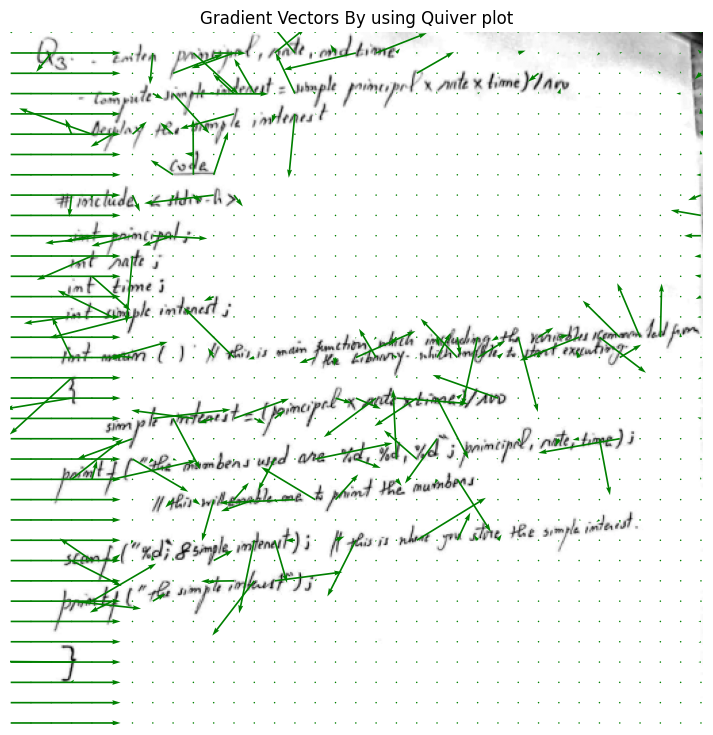

In [50]:
# To make the plot clear, lets reduce the number of pixels to be plotted by sampling 17 pixels which reduce the number of arrows in the plot
import numpy as np
step = 15
Y, X = np.mgrid[0:gradient_y.shape[0]:step, 0:gradient_x.shape[1]:step]  # this create coordinate (x,y) where the arrow will be in the plot

U = gradient_x[::step, ::step]  # This is the horizontal component of th egradient
V = -gradient_y[::step, ::step] # this is the vertical componte of the gradient and its marked negative because in image plots, the y part of the image is increasing downward direction

plt.figure(figsize=(9, 9))                    # Now here, the original grayscale image is displayed as a background
plt.imshow(gray_image, cmap='gray')

plt.quiver(X, Y, U, V, color='green', angles='xy') # This is the main line for showing the quiver plots in red colour, where xy is are angles that align arrows with x and y axises
plt.title('Gradient Vectors By using Quiver plot')
plt.axis('off')
plt.show()




# Task 5- Process a three-dimensional 3D colour image by using our pre-defined function



### Now, lets Load the RGB image and split into R, G, B channels

In [51]:
# Importing libraries for image processing and visualisation
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading of the image
rgb_path = 'RGB Image for Task 5.jpeg'
rgb_img = cv2.imread(rgb_path)

# Convert the image from BGR to RGB format since by default it comes its  BGR
rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)

# Resize the image to 512x512 pixels for code efficiency, consistent processing,  and display
rgb_img = cv2.resize(rgb_img, (512, 512))



Now, let's split the image into into its channel componets such as Red, Green and Blue

In [52]:
# Getting of red, green, and blue components of the image
red_channel = rgb_img[:, :, 0]
green_channel = rgb_img[:, :, 1]
blue_channel = rgb_img[:, :, 2]


In [53]:
# Applying the convolution function to each color channel using mode="display"
red_processed = convolution_function(red_channel, edge_kernel, mode="display")
green_processed = convolution_function(green_channel, edge_kernel, mode="display")
blue_processed = convolution_function(blue_channel, edge_kernel, mode="display")


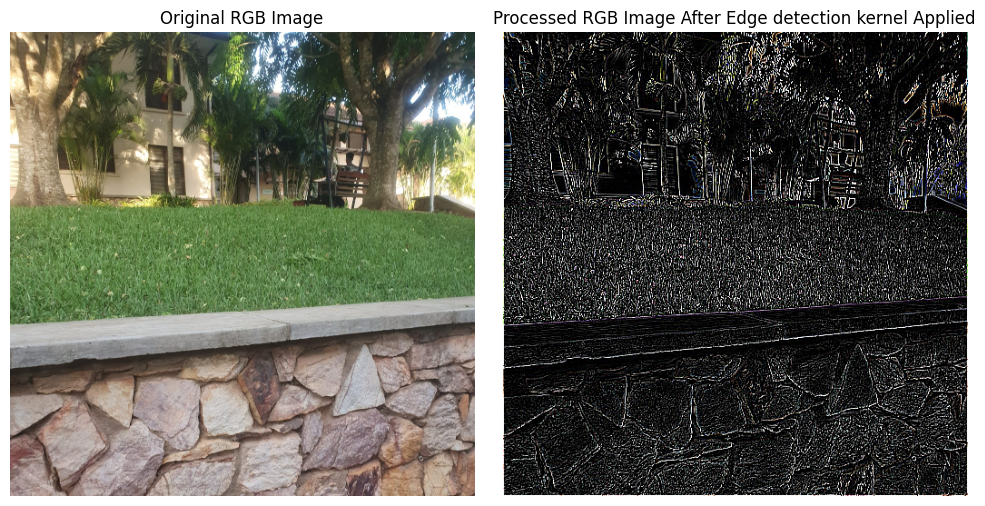

In [54]:
# Stack image color channels to reconstruct the final RGB image  after all the processing and tranformations
processed_rgb_image = np.stack((red_processed, green_processed, blue_processed), axis=2)

# Display the original and the processed image side by side
plt.figure(figsize=(10, 5))

# Displaying the orginal image on the screen
plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title("Original RGB Image")
plt.axis('off')
# Displaying the processed  final image after applying edge_kernel detection to all the chanels of the image
plt.subplot(1, 2, 2)
plt.imshow(processed_rgb_image)
plt.title("Processed RGB Image After Edge detection kernel Applied")
plt.axis('off')

plt.tight_layout()
plt.show()


# TASK 6: Creative Applications and exploration  of Linear Algebra and Multivariable Calculus in  Digital Image Processing

### In this task, we used my custom convolution_function() from Task 3 to explore creative image processing techniques.
### We applied all operations on the handwritten grayscale image for clarity and better feature visibility instead of the RGB Image.
### The focus was on feature extraction, simulated compression, and comparing my function with SciPy’s convolve2d.

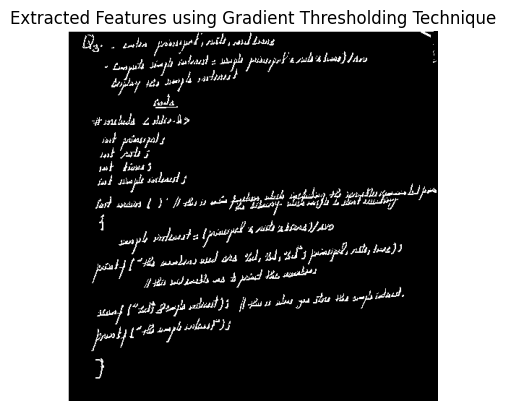

In [55]:
# First, let's extract important features using Sobel filters and a threshold.
# We’ll apply sobel_x and sobel_y using our custom convolution_function to detect edge strength.
# This helps us highlight the most important parts of the image based on strong gradients.
# Compute gradients in x and y direction

Gx = convolution_function(gray_image, sobel_x)
Gy = convolution_function(gray_image, sobel_y)

# Compute gradient magnitude to get edge strength
gradient_magnitude = np.sqrt(Gx.astype(float)**2 + Gy.astype(float)**2)

# Applying of  a threshold to extract strong features only
threshold_value = 200
features = (gradient_magnitude > threshold_value) * 255
features = features.astype(np.uint8)

# Now let's show the features visually
plt.imshow(features, cmap='gray')
plt.title("Extracted Features using Gradient Thresholding Technique")
plt.axis('off')
plt.show()




### Let's Simulate Compression using Blurring  and Resizing to see how the image will look like and we we will use the blur_kernel defined before

(-0.5, 511.5, 511.5, -0.5)

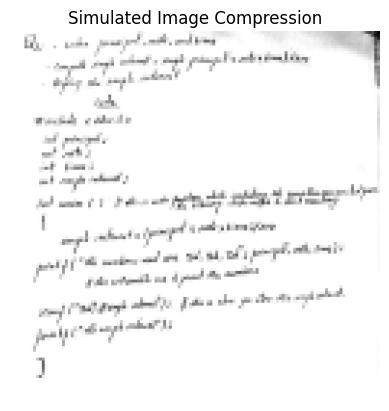

In [56]:
# Applying of  blur to smooth out small details in the image
blur_kernel = 1/9 * np.array( [[1, 1, 1], [1, 1, 1], [1, 1, 1]])
blurred_image = convolution_function(gray_image, blur_kernel)

# Resizing of  the image to a smaller version just for sumulating the compression purpose
small = cv2.resize(blurred_image, (128, 128), interpolation=cv2.INTER_LINEAR)

# Resizing it back to original size sumulating decomposition
reconstructed = cv2.resize(small, (gray_image.shape[1], gray_image.shape[0]), interpolation=cv2.INTER_NEAREST)

# visualizing  the final image after compression simulation
plt.imshow(reconstructed, cmap='gray')
plt.title("Simulated Image Compression")
plt.axis('off')


### Comparision of the output of our convolution_function and the one of python bulit-in libraries and modules specifically SciPy's convolve2d

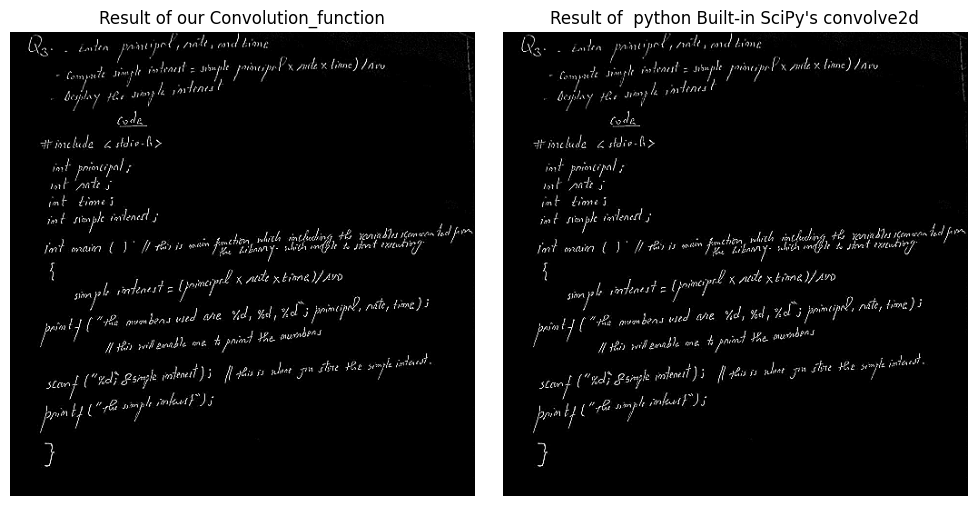

In [57]:
from scipy.signal import convolve2d

# Use same kernel for fair comparison
# We are going to use the same edge_kernel as the pre-defined one for fair comparision of the  results
edge_kernel = np.array([[0, 1, 0],
                        [1, -4, 1],
                        [0, 1, 0]])

# Using of  our convolution  function
custom_result = convolution_function(gray_image, edge_kernel)

# Applying SciPy's convolve2d
scipy_result = convolve2d(gray_image, edge_kernel, mode='same', boundary='fill', fillvalue=0)
scipy_result = np.clip(scipy_result, 0, 255).astype(np.uint8)

# Now lets visualize side by side results or outputs of the two approaches
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(custom_result, cmap='gray')
axs[0].set_title("Result of our Convolution_function")
axs[0].axis('off')

axs[1].imshow(scipy_result, cmap='gray')
axs[1].set_title("Result of  python Built-in SciPy's convolve2d")
axs[1].axis('off')

plt.tight_layout()
plt.show()



We used the same kernel for boht our manually defined convolution_function and the python built-in tool(SciPy’s module ) called convolve2d. After seeing the visual result, we can clearly see that they are similar and this a proof that our manually convolution_function programmed without any python library is performing well and correctly.


## Let's break the limits and explore some advanced image processing( Feature extraction) Techniques  as part of our task 6 in the project.

We decided to go beyond and explore two additional advanced image processing techniques, and those include the following

*Canny Edge Detection*:  A multi-stage algorithm that applies gradient filtering and edge linking to find sharp, connected boundaries.

*Laplacian of Gaussian (LoG)*: Combines smoothing (Gaussian) and second-order derivative (Laplacian) to detect both strong and fine features in the image.
All the above techniques are easy to use with the OpenCV library.

We got inspiration to explore this on our image from Learn OpenCv website

### Let's begin with canny edge detection technique

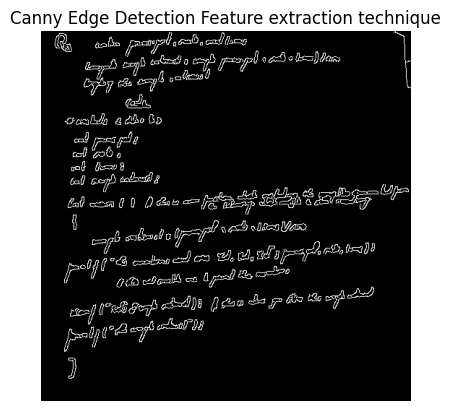

In [58]:
#Let's  first of all, apply a Gaussian Blur to smooth the image
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 1.4)

# Applying Canny Edge Detection using OpenCV as installed and imported in previous tasks
canny_edges = cv2.Canny(blurred_image, threshold1=100, threshold2=200)

# Display the result
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection Feature extraction technique")
plt.axis('off')
plt.show()


### Let's try to implement Laplacian of Gausian ( short form is LoG) technique  to reduce noise in the image.

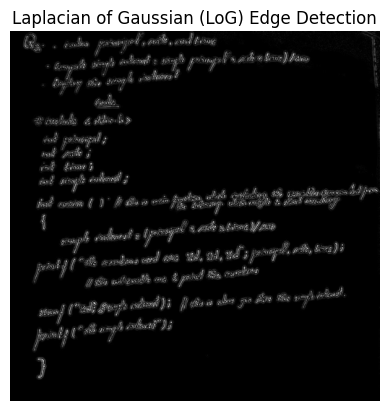

In [59]:
# Apply a Gaussian Blur first to reduce noise in the image
# This uses a 3 by 3 array as a Gaussian kernel, which is automatically chosen by OpenCV by using the sigma formula inside this libray which will be explained later in the report
smoothed = cv2.GaussianBlur(gray_image, (3, 3), 0)

# Applying Laplacian Operator (2nd order derivative) for edge detection from the noise-reduced image
laplacian_edges = cv2.Laplacian(smoothed, cv2.CV_64F)

# Convert to absolute values and 8-bit format to be able to visually represent the image
laplacian_edges = np.uint8(np.absolute(laplacian_edges))

# Showing the image after undergoing blurring and applying the Laplacian operator to it
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian of Gaussian (LoG) Edge Detection")
plt.axis('off')
plt.show()


## After applying the Laplacian of Gaussian (LoG), we noticed that the background became very dark while the handwritten text edges stood out clearly in white. This shows that the Gaussian blur helped remove small noise, and the Laplacian emphasized only the important structure in the image. LoG was effective in highlighting the clean outlines of the handwritten code, making it useful for feature extraction.



